## Overview: fmri movie data (camcan study) + application of gcns 
- Gcns used to classify blocks of fmri data in the movie across subjects

#### Glossary
- TR: Repetition time - time it takes to scan all 32 slices.
- fmri data: 193 Timepoints (193 x 2.47 = 476 secs = 7.9 mins) x 400 ROIs 

In [42]:
row_headers = [np.array(['filtered_&_norm','filtered_&_norm','filtered_&_norm', 'filtered', 'filtered', 'filtered']), np.array(['6','8','16','6','8','16'])]

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
results = [[0.931, 0.463, 0.694, 0.696],[0.89, 0.509, 0.825, 0.770],[0.927, 0.615, 0.844, 0.823],[0.873, 0.471, 0.729, '-'],[0.89, 0.526, 0.771, 0.731],[0.930, 0.662, 0.842, 0.819]]
column_names = ['FCN - Fully Connected', 'GCN_1st_order', 'GCN_5th_order', 'GCN_8th_order']
df = pd.DataFrame(results, columns= column_names, index=row_headers)
df

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FCN - Fully Connected GCN_1st_order GCN_5th_order  \
filtered_&_norm 6                   0.931         0.463         0.694   
                8                   0.890         0.509         0.825   
                16                  0.927         0.615         0.844   
filtered        6                   0.873         0.471         0.729   
                8                   0.890             -             -   
                16                  0.930         0.662         0.842   

                   GCN_8th_order  
filtered_&_norm 6          0.696  
                8           0.77  
                16         0.823  
filtered        6              -  
                8              -  
                16         0.819

#### Plot results

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


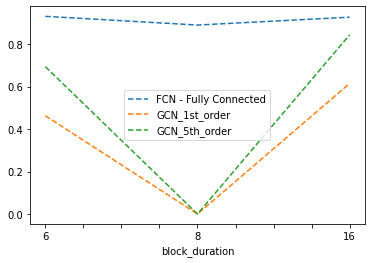

In [113]:
df1 = df.loc['filtered_&_norm', column_names]
df1['block_duration'] = df1.index
df1.plot(x="block_duration", y=column_names, linestyle='dashed');
plt.show()

#df1 = df1[['block_duration','FCN - Fully Connected', 'GCN_1st_order', 'GCN_5th_order']]
#df1.plot()
#df1.set_index('block_duration').plot(); #(kind = 'scatter')
#ax.set_xticks(range(len(g)))

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


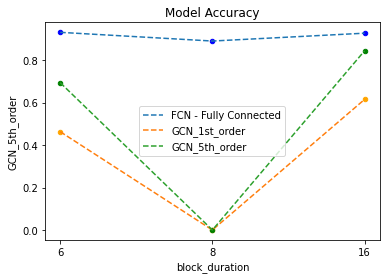

In [117]:
ax1 = df1.plot(kind='scatter', x="block_duration", y='FCN - Fully Connected', color='blue', title = 'Model Accuracy')  
ax2 = df1.plot(kind='scatter', x="block_duration", y='GCN_1st_order', color='orange', ax=ax1)  
ax3 = df1.plot(kind='scatter', x="block_duration", y='GCN_5th_order', color='g', ax=ax1)
ax4 = df1.plot(x="block_duration", y=column_names, linestyle='dashed', ax = ax1);


#8th order

ValueError: x and y must be the same size

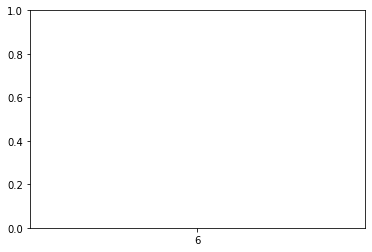

In [100]:
df1 = df.loc['filtered_&_norm', column_names]
df1['block_duration'] = df1.index
df1.plot(x="block_duration", y=column_names, kind = 'scatter'); #
plt.show() 

<AxesSubplot:xlabel='block_duration', ylabel='FCN - Fully Connected'>

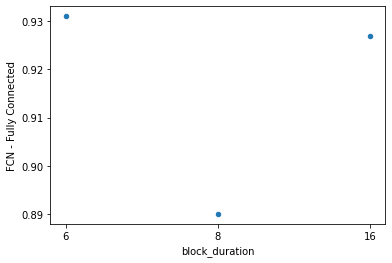

In [101]:
df1.plot(x="block_duration", y='FCN - Fully Connected', kind = 'scatter')

In [87]:
df1

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,FCN - Fully Connected,GCN_1st_order,GCN_5th_order,block_duration
6,0.931,0.46,-,6
8,0.890,-,-,8
16,0.927,0.615,0.844,16


In [61]:
pd.DataFrame.plot(df)

In [54]:
header = pd.MultiIndex.from_product([['FCN','GCN'],
                                     ['6','8','16']],
                                    names=['Data','block duration (#timpoints)'])
df = pd.DataFrame('-',
                  index=['filtered', 'non_filtered'], 
                  columns=header)
df

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data                        FCN       GCN      
block duration (#timpoints)   6  8 16   6  8 16
filtered                      -  -  -   -  -  -
non_filtered                  -  -  -   -  -  -

In [32]:
results = pd.DataFrame([[1, 2, 2], [4, 1, 5], [7,3, 8]],
     index=['row0', 'row1', 'row2'],
     columns=['col0','col1', 'col2'])
results

,col0,col1,col2
row0,1,2,2
row1,4,1,5
row2,7,3,8


In [58]:
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import math
import time
import datetime

import numpy as np
import pandas as pd
import scipy.io

import nibabel as nib
from scipy import sparse
from scipy.stats import spearmanr
from sklearn import preprocessing, metrics,manifold
from sklearn.model_selection import cross_val_score, train_test_split,ShuffleSplit
import itertools


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

#from torch_scatter import scatter_add
##from torch_geometric.utils import add_self_loops
##from utils import add_self_loops

from util_funcs import *
from model import *

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

#imports
#pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu102.html

#CPU
device = torch.device("cpu")
print(device)

cpu


In [3]:
#%load_ext autoreload
#%autoreload
#%reload_ext autoreload
#import sys
#reload(sys)

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
check()

Hey there Check


#### Contents

* [1. Data](#data) 
* [2. Inspect data](#inspect_data)
* [3. Data loader](#data_loader)
* [4. FCNs](#fcn)
* [5. GCNs](#gcn)

In [5]:
check2()

Heylo there :D


### 1. Data - fmri data <a class="anchor" id="data"></a>

In [6]:
#Adjacency matrix 
root_pth = '/camcan/schaefer_parc/'
adj_mat = get_rsfmri_adj_matrix(root_pth)
#plot_corr_matrix(adj_mat)

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  std[std < np.finfo(np.float).eps] = 1.  # avoid numerical problems
/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.htm

In [7]:
#Format adj matrix
adj_mat = Adjacency_matrix(adj_mat, n_neighbours = 8).get_adj_sp_torch_tensor() #class imported from util_funcs
adj_mat

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tensor(indices=tensor([[  1,   2,   3,  ..., 396, 397, 398],
                       [  0,   0,   0,  ..., 399, 399, 399]]),
       values=tensor([0.3348, 0.4519, 0.3895,  ..., 0.4030, 0.5090, 0.3403]),
       size=(400, 400), nnz=4198, layout=torch.sparse_coo)

In [8]:
#fmri
root_pth = '/camcan/schaefer_parc/'
fmri_movie, subj_list = get_fmri_data(root_pth, 'Movie')
print(np.array(fmri_movie).shape) #(193, 400)
print(len(subj_list)) #644 subjects
fmri_movie_copy = fmri_movie.copy()

(644, 193, 400)
644


In [9]:
#Params
TR = 2.47
n_subjects = np.array(fmri_movie).shape[0]
print(f'N subjects = {n_subjects}')
n_regions = np.array(fmri_movie).shape[2] 

N subjects = 644


In [27]:
#Specify block duration
block_duration = 16 #8 #16 #6 #16 8#Factor of 192 
total_time = fmri_movie.shape[1]
n_blocks = total_time // block_duration
n_labels = n_blocks
print(f'Number of blocks = {n_blocks}')
total_time = block_duration*n_blocks #Rounded number 
print(f'Total time = {total_time}')

Number of blocks = 12
Total time = 192


In [12]:
fmri_movie_copy = fmri_movie.copy()

### 2.  Inspect data <a class="anchor" id="inspect_data"></a>

(193,)


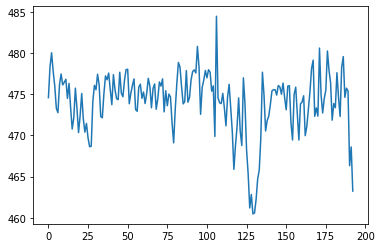

In [14]:
#Original - Plot x1 subject -1st ROI
subj_num = 1; ROI_num = 1;
fmri_1 = np.array(fmri_movie)[subj_num,:,ROI_num]
print(fmri_1.shape)
idx = range(0, len(fmri_1))
plt.plot(idx, fmri_1)

##### Normalised data

(193, 1)


/home/hannahcraddock/anaconda3/envs/hannah_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


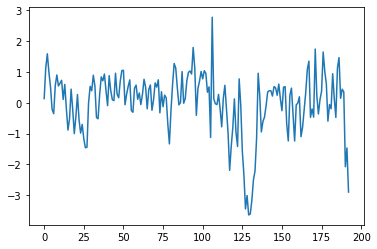

In [16]:
#Normalise
scaler = preprocessing.StandardScaler()
fmri_norm_1 = np.expand_dims(fmri_1, axis = 0).T
print(fmri_norm_1.shape)
fmri_norm_1 = scaler.fit_transform(fmri_norm_1)
plt.plot(idx, fmri_norm_1)
#plt.plot(idx, fmri_data_roi1[0,:])

##### Filtered data

In [18]:
#### Detrend data
fmri_filtered = nilearn.signal.clean(np.array(fmri_movie_copy)[1,:,:], sessions=None, detrend=True, 
                                       standardize='psc', confounds=None, low_pass=0.1, 
                                       high_pass=0.01, t_r=0.392, ensure_finite=False)
print(np.array(fmri_filtered).shape)

(193, 400)


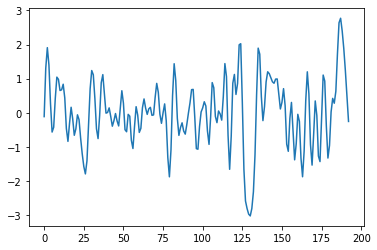

In [20]:
#Filter
fmri_filtered1 = nilearn.signal.clean(fmri_norm_1, sessions=None, detrend=True, 
                                       standardize='zscore', confounds=None, low_pass=0.1, 
                                       high_pass=0.01, t_r= TR, ensure_finite=False)
#Plot
plt.plot(idx, fmri_filtered1)

## 3.1 Filtered Data

### 3.1.1 Filter data 

In [13]:
def filter_fmri(fmri, standardize):  
    'filter fmri signal'
    
    #fmri
    fmri_filtered = []
    for subj in np.arange(0, fmri_movie_copy.shape[0]):
        fmri_subj = fmri_movie_copy[subj]
        filtered = nilearn.signal.clean(fmri_subj, sessions= None, detrend=True, 
                               standardize= False, confounds=None, low_pass= 0.1, 
                               high_pass= 0.01, t_r = TR, ensure_finite=False)
        fmri_filtered.append(filtered)
    
    return fmri_filtered

In [14]:
#Apply
standardize = False # 'zscore', 'psc'
fmri_filtered = filter_fmri(fmri_movie_copy, standardize)
print(np.array(fmri_filtered).shape)

/home/hannahcraddock/anaconda3/envs/env_python38/lib/python3.8/site-packages/nilearn/signal.py:204: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not std < np.finfo(np.float).eps:


(644, 193, 400)


### 3.  Dataloader (Train & Test sets) <a class="anchor" id="data_loader"></a>

In [28]:
#Split into train and test 
params = {'batch_size': 2, 
          'shuffle': True,
          'num_workers': 2}

test_size = 0.2
randomseed= 12345
rs = np.random.RandomState(randomseed)
#Training/Test indices
train_idx, test_idx = train_test_split(range(n_subjects), test_size = test_size, random_state=rs, shuffle=True)
print('Training on %d subjects, Testing on %d subjects' % (len(train_idx), len(test_idx)))

Training on 515 subjects, Testing on 129 subjects


In [29]:
#Train set
print(f'Block duration = {block_duration}')
fmri_data_train = [fmri_filtered[i] for i in train_idx] #Training subjects 
print(np.array(fmri_data_train).shape)
fmri_train = Fmri_dataset(fmri_data_train, TR, block_duration)
train_loader = DataLoader(fmri_train, collate_fn = fmri_samples_collate_fn, **params)

#Test set
fmri_data_test = [fmri_filtered[i] for i in test_idx]
print(np.array(fmri_data_test).shape)
fmri_test = Fmri_dataset(fmri_data_test, TR, block_duration)
test_loader = DataLoader(fmri_test, collate_fn=fmri_samples_collate_fn, **params)

Block duration = 16
(515, 193, 400)
(129, 193, 400)


### Part 2: Train Models

### 1. FCN <a class="anchor" id="fcn"></a>

- Data = Filtered + Normalised

##### Block duration = 8*TR

Block duration = 8
FCN(
  (linear): Linear(in_features=400, out_features=128, bias=True)
  (hidden2label): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=24, bias=True)
  )
)
56248 paramters to be trained in the model


Epoch 0: 
Time Usage:1.337128 | Training Loss 0.046907 | Acc 0.320146
Test Loss 0.027743 | Acc 0.691860
Model updated: Best-Acc = 0.691860

Epoch 1: 
Time Usage:1.265539 | Training Loss 0.030255 | Acc 0.569175
Test Loss 0.018432 | Acc 0.798773
Model updated: Best-Acc = 0.798773

Epoch 2: 
Time Usage:1.241914 | Training Loss 0.024510 | Acc 0.650809
Test Loss 0.017925 | Acc 0.817506
Model updated: Best-Acc = 0.817506

Epoch 3: 
Time Usage:1.249769 | Training Loss 0.021093 | Acc 0.699919
Test Loss 0.017511 | Acc 0.798127

Epoch 4: 
Time Usage:1.300156 | Training Loss 0.019540 | Acc 0.726861
Test Loss 0.011862 | Acc 0.865956
Model updated

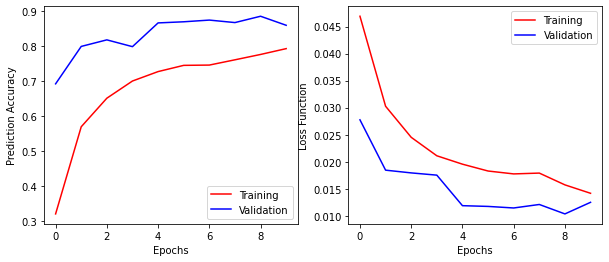

0.8850129198966409

In [18]:
#CPU
print(f'Block duration = {block_duration}')

#Model params
loss_func = nn.CrossEntropyLoss(); num_epochs=10

#Define model 
model = FCN(n_regions, n_labels) #time points == x, regions == rows 
model = model.to(device)
print(model)
print("{} paramters to be trained in the model\n".format(count_parameters(model)))
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

model_fit_evaluate(model, adj_mat, device, train_loader, test_loader, optimizer, loss_func, num_epochs)

##### Block duration = 16*TR

Block duration = 16
cpu
FCN(
  (linear): Linear(in_features=400, out_features=128, bias=True)
  (hidden2label): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=12, bias=True)
  )
)
55852 paramters to be trained in the model


Epoch 0: 
Time Usage:1.242667 | Training Loss 0.065674 | Acc 0.466990
Test Loss 0.032417 | Acc 0.804910
Model updated: Best-Acc = 0.804910

Epoch 1: 
Time Usage:1.208366 | Training Loss 0.036888 | Acc 0.710356
Test Loss 0.023124 | Acc 0.857881
Model updated: Best-Acc = 0.857881

Epoch 2: 
Time Usage:1.175550 | Training Loss 0.026914 | Acc 0.799515
Test Loss 0.018950 | Acc 0.882429
Model updated: Best-Acc = 0.882429

Epoch 3: 
Time Usage:1.207303 | Training Loss 0.024702 | Acc 0.818285
Test Loss 0.014443 | Acc 0.909561
Model updated: Best-Acc = 0.909561

Epoch 4: 
Time Usage:1.238869 | Training Loss 0.022235 | Acc 0.841424
Test Lo

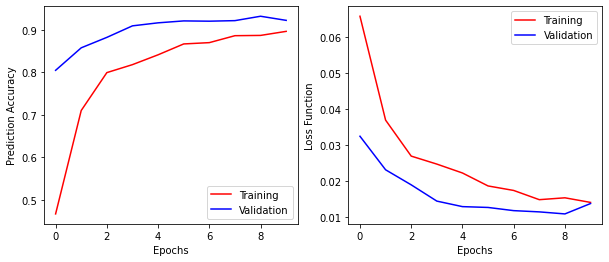

0.9321705426356589

In [22]:
print(f'Block duration = {block_duration}')

#CPU
device = torch.device("cpu")
print(device)

#Define model 
model = FCN(n_regions, n_labels) #time points == x, regions == rows 
model = model.to(device)
print(model)
print("{} paramters to be trained in the model\n".format(count_parameters(model)))
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
loss_func = nn.CrossEntropyLoss()
num_epochs=10
#adj_mat = 'a'

model_fit_evaluate(model, adj_mat, device, train_loader, test_loader, optimizer, loss_func, num_epochs)

##### Block duration = 6*TR

Block duration = 6
FCN(
  (linear): Linear(in_features=400, out_features=128, bias=True)
  (hidden2label): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=32, bias=True)
  )
)
56512 paramters to be trained in the model


Epoch 0: 
Time Usage:1.359325 | Training Loss 0.040161 | Acc 0.257585
Test Loss 0.024153 | Acc 0.663033
Model updated: Best-Acc = 0.663033

Epoch 1: 
Time Usage:1.362276 | Training Loss 0.027355 | Acc 0.494903
Test Loss 0.017085 | Acc 0.772771
Model updated: Best-Acc = 0.772771

Epoch 2: 
Time Usage:1.360862 | Training Loss 0.022295 | Acc 0.596420
Test Loss 0.013858 | Acc 0.820010
Model updated: Best-Acc = 0.820010

Epoch 3: 
Time Usage:1.398072 | Training Loss 0.021166 | Acc 0.617536
Test Loss 0.012997 | Acc 0.826066
Model updated: Best-Acc = 0.826066

Epoch 4: 
Time Usage:1.363509 | Training Loss 0.018531 | Acc 0.662743
Test Loss 0.

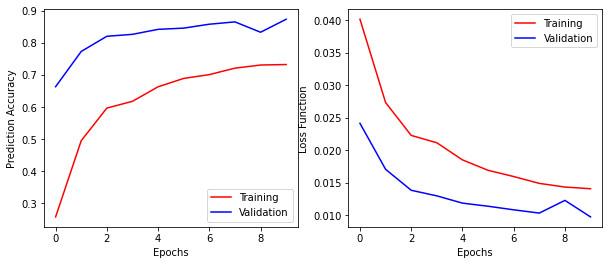

0.873062015503876

In [26]:
#Block duration
print(f'Block duration = {block_duration}')

#Define model 
model = FCN(n_regions, n_labels) #time points == x, regions == rows 
model = model.to(device)
print(model)
print("{} paramters to be trained in the model\n".format(count_parameters(model)))
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
loss_func = nn.CrossEntropyLoss()
num_epochs=10
#adj_mat = 'a'

model_fit_evaluate(model, adj_mat, device, train_loader, test_loader, optimizer, loss_func, num_epochs)

In [22]:
print('hi')

### 2. GCN <a class="anchor" id="gcn"></a>

Block duration = 16
Using GCN Layers instead
ChebNet(
  (graph_features): ModuleList(
    (0): GraphConv (16 -> 32)
    (1): GraphConv (32 -> 32)
    (2): GraphConv (32 -> 32)
  )
  (dropout): Dropout(p=0.25, inplace=False)
  (pool): AdaptiveMaxPool2d(output_size=(360, 1))
  (linear): Linear(in_features=360, out_features=12, bias=True)
  (hidden2label): Sequential(
    (0): Linear(in_features=360, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=128, out_features=32, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=32, out_features=12, bias=True)
  )
)
57720 paramters to be trained in the model


Epoch 0: 
Time Usage:61.415676 | Training Loss 0.104224 | Acc 0.103398
Test Loss 0.099404 | Acc 0.171189
Model updated: Best-Acc = 0.171189

Epoch 1: 
Time Usage:60.722704 | Training Loss 0.089011 | Acc 0.249515
Test Loss 0.074823 | Acc 0.406331
Model updated: Be

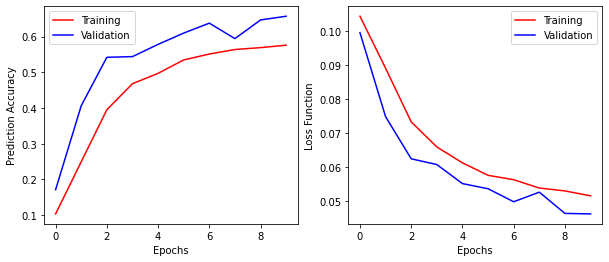

0.6569767441860465

In [30]:
from model import ChebNet

print(f'Block duration = {block_duration}')

#Model params 
loss_func = nn.CrossEntropyLoss()
filters = 32; num_layers = 2
num_epochs = 10 
model_test = ChebNet(block_duration, filters, n_labels, gcn_layer = num_layers,dropout=0.25,gcn_flag=True)
#model_test = ChebNet(block_dura, filters, Nlabels, K=5,gcn_layer=num_layers,dropout=0.25)

model_test = model_test.to(device)
adj_mat = adj_mat.to(device)
print(model_test)
print("{} paramters to be trained in the model\n".format(count_parameters(model_test)))

optimizer = optim.Adam(model_test.parameters(),lr=0.001, weight_decay=5e-4)

model_fit_evaluate(model_test,adj_mat,device,train_loader,test_loader,optimizer, loss_func, num_epochs)

#### GCN - expanding to k-th order neighborhood (connecting by k steps)

ChebNet(
  (graph_features): ModuleList(
    (0): ChebConv(16, 32, K=5)
    (1): ChebConv(32, 32, K=5)
    (2): ChebConv(32, 32, K=5)
  )
  (dropout): Dropout(p=0.25, inplace=False)
  (pool): AdaptiveMaxPool2d(output_size=(360, 1))
  (linear): Linear(in_features=360, out_features=12, bias=True)
  (hidden2label): Sequential(
    (0): Linear(in_features=360, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=128, out_features=32, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=32, out_features=12, bias=True)
  )
)
70520 paramters to be trained in the model


Epoch 0: 
Time Usage:193.531943 | Training Loss 0.102366 | Acc 0.108738
Test Loss 0.097362 | Acc 0.186047
Model updated: Best-Acc = 0.186047

Epoch 1: 
Time Usage:198.845068 | Training Loss 0.089482 | Acc 0.252589
Test Loss 0.076910 | Acc 0.395349
Model updated: Best-Acc = 0.395349

Epoch 2: 
Time Usage:

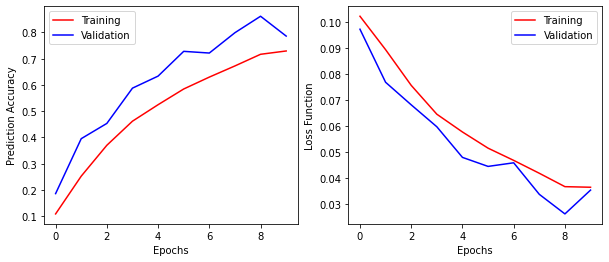

0.8617571059431525

In [31]:
#Model params 
loss_func = nn.CrossEntropyLoss()
filters = 32; num_layers = 2
num_epochs = 10 

#Model
model_test = ChebNet(block_duration, filters, n_labels, K=5, gcn_layer=num_layers,dropout=0.25)
model_test = model_test.to(device)

#adj_mat = adj_mat.to(device)
print(model_test)
print("{} paramters to be trained in the model\n".format(count_parameters(model_test)))

optimizer = optim.Adam(model_test.parameters(),lr=0.001, weight_decay=5e-4)

model_fit_evaluate(model_test,adj_mat,device,train_loader,test_loader,optimizer,loss_func,num_epochs)

## 3.2. Unfiltered Data

### 3.  Dataloader (Train & Test sets) <a class="anchor" id="data_loader"></a>

In [ ]:
#Split into train and test 
params = {'batch_size': 2, 
          'shuffle': True,
          'num_workers': 2}

test_size = 0.2
randomseed= 12345
rs = np.random.RandomState(randomseed)
#Training/Test indices
train_idx, test_idx = train_test_split(range(n_subjects), test_size = test_size, random_state=rs, shuffle=True)
print('Training on %d subjects, Testing on %d subjects' % (len(train_idx), len(test_idx)))

In [ ]:
#Train set
fmri_data_train = [fmri_movie[i] for i in train_idx] #Training subjects 
print(np.array(fmri_data_train).shape)
fmri_train = Fmri_dataset(fmri_data_train, TR, block_duration)
train_loader = DataLoader(fmri_train, collate_fn = fmri_samples_collate_fn, **params)

#Test set
fmri_data_test = [fmri_movie[i] for i in test_idx]
print(np.array(fmri_data_test).shape)
fmri_test = Fmri_dataset(fmri_data_test, TR, block_duration)
test_loader = DataLoader(fmri_test, collate_fn=fmri_samples_collate_fn, **params)

### Part 2: Train Models

### 1. FCN <a class="anchor" id="fcn"></a>

- Data = Filtered + Normalised

##### Block duration = 8*TR

In [ ]:
#CPU
device = torch.device("cpu")
print(device)

#Define model 
model = FCN(n_regions, n_labels) #time points == x, regions == rows 
model = model.to(device)
print(model)
print("{} paramters to be trained in the model\n".format(count_parameters(model)))
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
#adj_mat = 'a'

model_fit_evaluate(model, adj_mat, device, train_loader, test_loader, optimizer, loss_func, num_epochs)

##### Block duration = 16*TR

In [ ]:
print(f'Block duration = {block_duration}')

#CPU
device = torch.device("cpu")
print(device)

#Define model 
model = FCN(n_regions, n_labels) #time points == x, regions == rows 
model = model.to(device)
print(model)
print("{} paramters to be trained in the model\n".format(count_parameters(model)))
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
loss_func = nn.CrossEntropyLoss()
num_epochs=10
#adj_mat = 'a'

model_fit_evaluate(model, adj_mat, device, train_loader, test_loader, optimizer, loss_func, num_epochs)

In [ ]:
print('hi')

### 2. GCN <a class="anchor" id="gcn"></a>

In [ ]:
from model import ChebNet

#Model params 
loss_func = nn.CrossEntropyLoss()
filters = 32; num_layers = 2
num_epochs = 10 
model_test = ChebNet(block_duration, filters, n_labels, gcn_layer = num_layers,dropout=0.25,gcn_flag=True)
#model_test = ChebNet(block_dura, filters, Nlabels, K=5,gcn_layer=num_layers,dropout=0.25)

model_test = model_test.to(device)
adj_mat = adj_mat.to(device)
print(model_test)
print("{} paramters to be trained in the model\n".format(count_parameters(model_test)))

optimizer = optim.Adam(model_test.parameters(),lr=0.001, weight_decay=5e-4)

model_fit_evaluate(model_test,adj_mat,device,train_loader,test_loader,optimizer, loss_func, num_epochs)

#### GCN - expanding to k-th order neighborhood (connecting by k steps)

In [ ]:
model_test = ChebNet(block_duration, filters, n_labels, K=5, gcn_layer=num_layers,dropout=0.25)

#Model params 
loss_func = nn.CrossEntropyLoss()
filters = 32; num_layers = 2
num_epochs = 10 

model_test = model_test.to(device)
#adj_mat = adj_mat.to(device)
print(model_test)
print("{} paramters to be trained in the model\n".format(count_parameters(model_test)))

optimizer = optim.Adam(model_test.parameters(),lr=0.001, weight_decay=5e-4)

model_fit_evaluate(model_test,adj_mat,device,train_loader,test_loader,optimizer,loss_func,num_epochs)